# **CHURN DATASET**

## **INTRODUCTION**

The dataset contain information about seven thousand and forty three(7,043) customers and twenty-one(21) features describing themselves and the service the telcom company provided them.

The dataset in this notebook includes information about
- Customers who left the last month - the column is called Churn.
- Services that each customer has signed up for - phone, multiple line, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
- Customer account information - how long they've been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
- Demographic info about customers - gender and if they have partners and dependents.

## **DATA DICTIONARY**

- Gender - whether the customer is a male or a female.
- SeniorCitizen - whether the customer is a senior citizen or not.
- Partner - whether the customer has a partner or not.
- Dependents - whether the customer has dependents or not.
- tenure - number of months the customer has stayed with the company
- PhoneService - whether the customer has a phone service or not.
- MultipleLines - whether the customer has multiple lines or not.
- InternetService - customer's internet service provider(DSL, Fiber optic, No).
- OnlineSecurity - whether the customer has online security or not (Yes, No, No internet service).
- OnlineBackup - whether the customemr has online backup or not (Yes, No, No internet service).
- DeviceProtection - whether the customemr has device protection or not (Yes, No, No internet service).
- TechSupport - whether the customemr has tech support or not (Yes, No, No internet service).
- StreamingTV - whether the customemr has streaming TV or not (Yes, No, No internet service).
- StreamingMovies - whether the customemr has streaming movies or not (Yes, No, No internet service).
- Contract - The contract term of the customer (Month-to-month, One year, Two year).
- PaperlessBilling - whether the customemr has paperless billing or not (Yes, No).
- PaymentMethod - the customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - the amount charged to the customer monthly.
- TotalCharges - the total amount charged to the customer.
- Churn - whether the customer churned or not (Yes, No).

## **LOADING DATASET**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


>The output above shows the first five rows of the dataset and from the output one can easily tell that there are more features in the dataset belonging to the object datatype. Also, no null value is spotted in the _head_ of the data. **No null value in the _head_ of the data does not mean there can't be missing value in the rest of the data.**

## **PRELIMINARY WRANGLING**

### **SHAPE OF DATASET**

> The dataset have 7,043 rows and 21 features(columns).

In [3]:
data.shape

(7043, 21)

### **NON-NULL COUNT AND FEATURE DATATYPE**

> The output below shows that there are no missing values in the dataset as the non-null count is same as the count of entries from the output of running **_data.shape_**.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## **FURTHER WRANGLING**

> A copy of the dataset is made in other not to affect the original data.

In [5]:
df = data.copy()

### **CHANGE CASING**

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

> The output above shows inconsistent casing of the feauture names - some features have the title casing style while some have the lower casing.

### **FIXING CASING OF FEATURE NAMES**

In [7]:
col_name = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

for col in col_name:
    df.rename(columns={col : col.title()}, inplace=True)

In [8]:
df.columns

Index(['Customerid', 'Gender', 'Seniorcitizen', 'Partner', 'Dependents',
       'Tenure', 'Phoneservice', 'Multiplelines', 'Internetservice',
       'Onlinesecurity', 'Onlinebackup', 'Deviceprotection', 'Techsupport',
       'Streamingtv', 'Streamingmovies', 'Contract', 'Paperlessbilling',
       'Paymentmethod', 'Monthlycharges', 'Totalcharges', 'Churn'],
      dtype='object')

### **CHECK THE DATATYPE AND NON-NULL COUNT USING INFO**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customerid        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   Seniorcitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   Phoneservice      7043 non-null   object 
 7   Multiplelines     7043 non-null   object 
 8   Internetservice   7043 non-null   object 
 9   Onlinesecurity    7043 non-null   object 
 10  Onlinebackup      7043 non-null   object 
 11  Deviceprotection  7043 non-null   object 
 12  Techsupport       7043 non-null   object 
 13  Streamingtv       7043 non-null   object 
 14  Streamingmovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperlessbilling  7043 non-null   object 


> The datatype of most of the features in the dataset belongs to the ***object*** datatype. Though most of the features have the object datatype but will converted to any of the numeric datatype to build the Machine Learning model. **The Totalcharges feature should be converted from object to float.**

### **FIX THE DATATYPE OF THE _Totalcharges_ FEATURE**

In [10]:
df['Totalcharges'] = pd.to_numeric(df['Totalcharges'], errors='coerce')

> The line of code above changes the datatype of values of the features from object to float, passing _coerce_ as the argument of the parameter _error_ sets all invalid parsing as NaN.

In [11]:
df['Totalcharges'].dtype

dtype('float64')

> Above is the new datatype of the **_Totalcharges_** feature of the dataset.

### **MISSING VALUES**

> After changing the datatype of the  **_Totalcharges_** feature, it is advisable to check for missing values in the dataset.

In [12]:
df.isna().sum()

Customerid           0
Gender               0
Seniorcitizen        0
Partner              0
Dependents           0
Tenure               0
Phoneservice         0
Multiplelines        0
Internetservice      0
Onlinesecurity       0
Onlinebackup         0
Deviceprotection     0
Techsupport          0
Streamingtv          0
Streamingmovies      0
Contract             0
Paperlessbilling     0
Paymentmethod        0
Monthlycharges       0
Totalcharges        11
Churn                0
dtype: int64

> Running the _info_ method on the dataset earlier shows there are no missing values, calling the _isna_ method on the dataset shows that there are 11 missing values in the dataset. This missing values came about after converting the _Totalcharges_ to the numeric datatype.

### **DROP MISSING VALUES**

> There are other methods of dealing with missing data but dropping 11 missing datapoints from 7,043 datapoints won't hurt the dataset. This datapoints will be dropped along the row.

In [13]:
df.dropna(axis=0, inplace=True)

In [14]:
df.isna().sum().sum()

0

> The line of code above checks for the total number missing values in the entire dataset and the output shows the total missing values - 0.

### **DESCRIPTIVE STATISTICS**

> Below I check the descriptive statistics of features in the dataset, calling the **_describe_** method on the dataframe by default returns the statistics of numeric features only.

In [15]:
df.describe()

,Seniorcitizen,Tenure,Monthlycharges,Totalcharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


> The output above looks cool. Looking at the descriptive statistics of two features from the above output, **_Monthlycharges_** and **_Totalcharges_**, it is expected that the **_Totalcharges_** have higher values than the **_Monthlycharges_**.

### **MAKE _Customerid_ COLUMN THE INDEX COLUMN**

> Since the entry on the **_Customerid_** column is unique, it can be made the index column of the DataFrame.

In [16]:
df.set_index('Customerid', inplace=True)
df.head()

,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,Onlinebackup,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
Customerid,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **SHAPE OF DATASET**

> Setting the column of the dataset to **_Customerid_** reduces the number of features in the dataset; from 21 - 20

In [17]:
df.shape

(7032, 20)

In [18]:
df.Paymentmethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

### **REPLACE VALUES IN THE _Paymentmethod_**

> I decided to replace values of the ***Paymentmethod*** with a short string, this is to make the legend for the plot short.

In [19]:
df['Paymentmethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [20]:
data_dict = {'Electronic check': 'EC',
             'Mailed check': 'MC',
             'Bank transfer (automatic)': 'BT(A)',
             'Credit card (automatic)': 'CC(A)'}

In [21]:
df['Paymentmethod'] = df['Paymentmethod'].map(data_dict)

In [22]:
df.Paymentmethod.unique()

array(['EC', 'MC', 'BT(A)', 'CC(A)'], dtype=object)

## **DATA VISUALIZATION**

> First, I will like to start with the proportion of the target feature. 


### **PROPORTION OF THE TARGET FEATURE - CHURN**

[Text(0, 0, '73.4%'), Text(0, 0, '26.6%')]

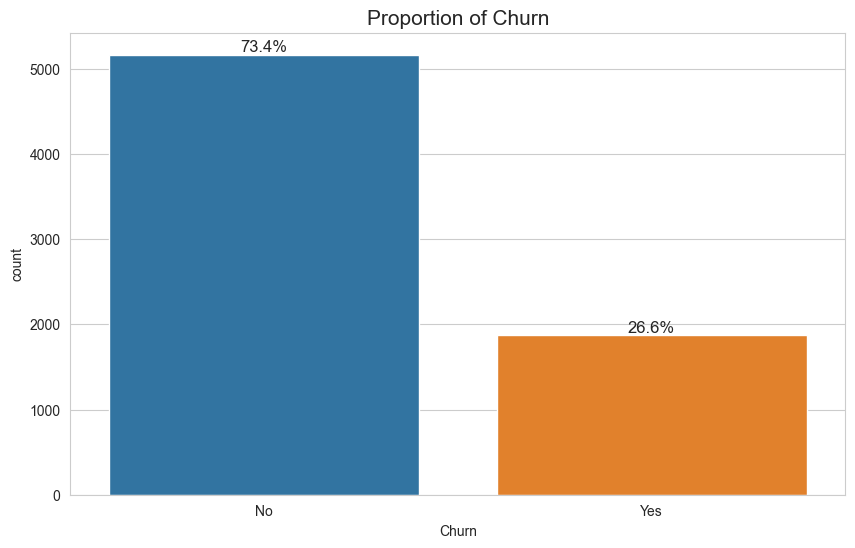

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
count = sns.countplot(x='Churn', data=df)
plt.title('Proportion of Churn', size=15)
ax.bar_label(count.containers[0], labels=['73.4%', '26.6%'], size=12)

>The plot below shows that there are more people who stood with the company than people that left the company, this is a case of class imbalance - proportion of the variables in the feature have variation.

### **DISTRIBUTION OF NUMERIC FEATURES**

> For this plot I decided to use a histogram to show the distribution of numeric features with values other than 0s and 1s.

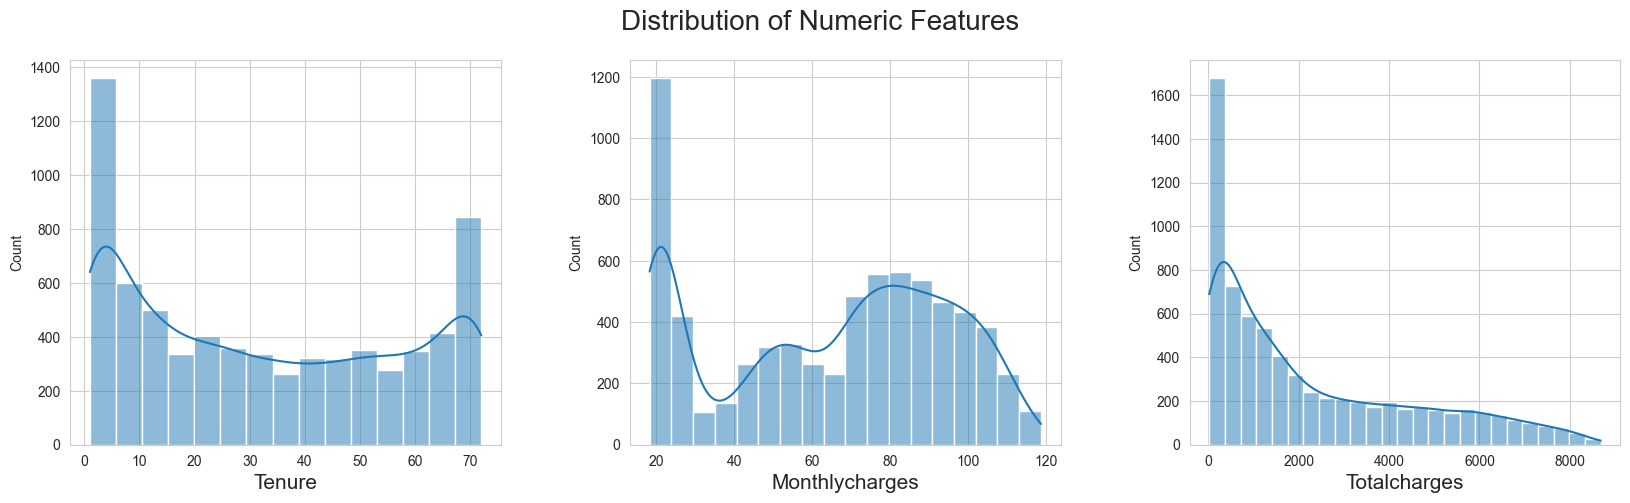

In [25]:
num_feat = ['Tenure', 'Monthlycharges', 'Totalcharges']

plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace=0.3)
plt.suptitle('Distribution of Numeric Features', size=20)

for i, feat in enumerate(num_feat):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[feat], kde=True)
    plt.xlabel(feat, size=15)

>The plot above shows that the **_Totalcharges_** is right-skewed.

### **DISTRIBUTION OF CATEGORICAL FEATURE**

> Below I will make a countplot to show the count of all categorical features in the dataset, this alone gives me an idea of how 'distributed' the unique variables of the features are.

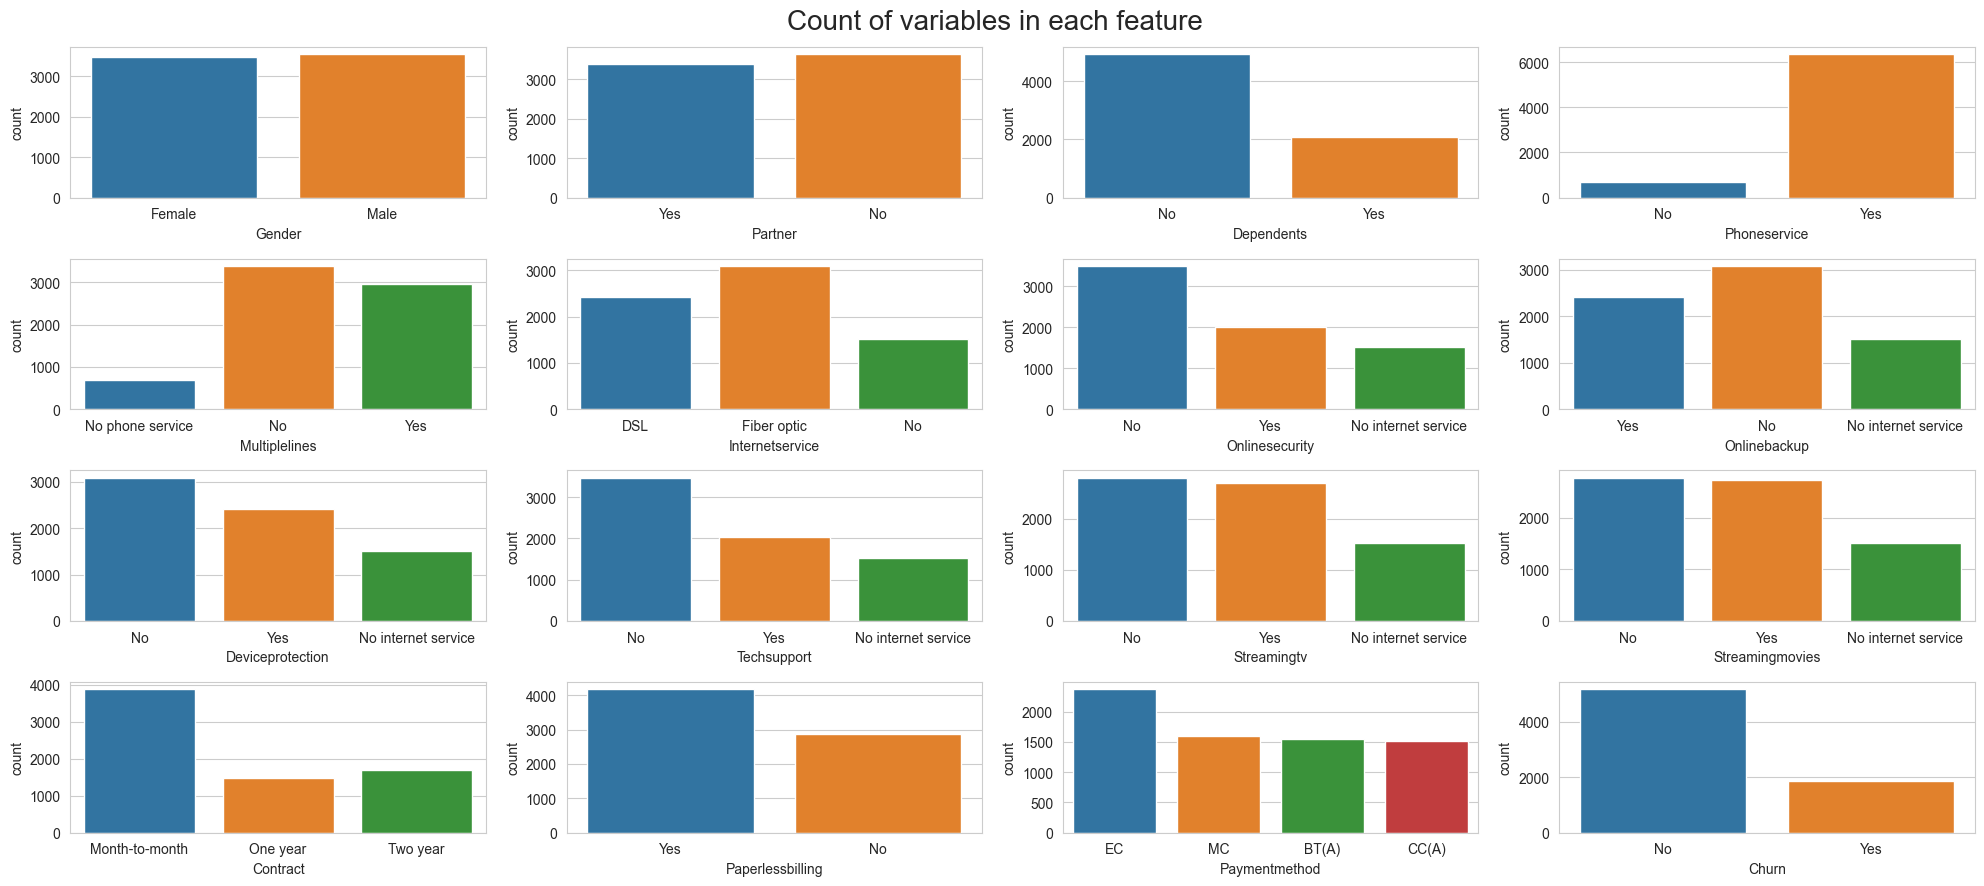

In [26]:
# created a list of categorical columns in the dataset to be converted to numerical columns
cat_feat = ['Gender', 'Partner', 'Dependents', 'Phoneservice', 
       'Multiplelines', 'Internetservice', 'Onlinesecurity', 'Onlinebackup', 
       'Deviceprotection', 'Techsupport', 'Streamingtv', 'Streamingmovies', 
       'Contract', 'Paperlessbilling', 'Paymentmethod', 'Churn']

plt.figure(figsize=(20, 9))
plt.subplots_adjust(wspace=0.3)
plt.suptitle('Count of variables in each feature', size=20)

for i, feat in enumerate(cat_feat):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=df[feat], data=df)
plt.tight_layout()

<Axes: xlabel='Monthlycharges', ylabel='Totalcharges'>

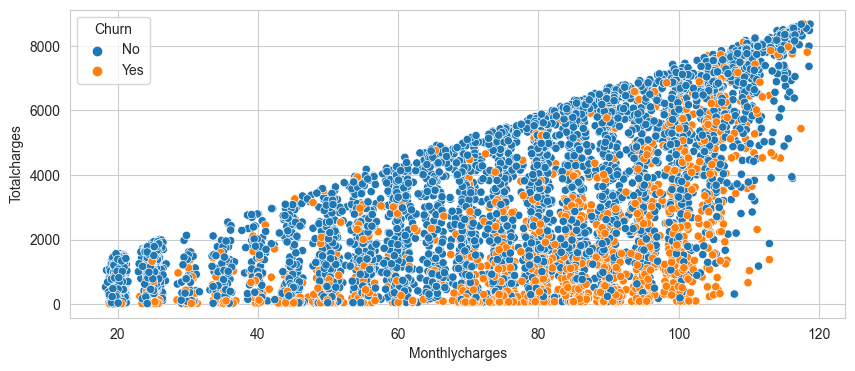

In [29]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Monthlycharges', y='Totalcharges', hue='Churn', data=df)

<Axes: xlabel='Tenure', ylabel='Totalcharges'>

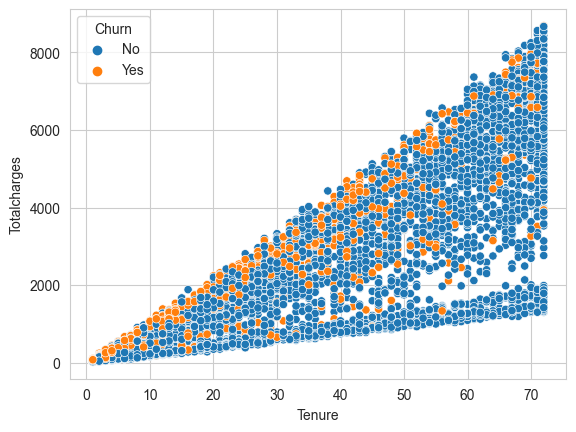

In [28]:
sns.scatterplot(x='Tenure', y='Totalcharges', hue='Churn', data=df)

## **MODEL BUILDING**

### **CONVERT THE CATEGORICAL FEATURES OF THE DATASET TO NUMERICAL FEATURES**

> Machine Learning algorithms do not work with datatypes other than the numeric datatype, so all categorical features in the dataset will be convert to numeric features.
>
> To do this, I have decided to use the LabelEncoder from scikit-learn. LabelEncoder replaces categories in the column to numbers using the **_pd.get_dummies()_** method will create more features in the dataset.

In [29]:
from sklearn.preprocessing import LabelEncoder

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
encoder = LabelEncoder()

In [ ]:
# created a list of categorical columns in the dataset to be converted to numerical columns
cat_feat = ['Gender', 'Partner', 'Dependents', 'Phoneservice', 
       'Multiplelines', 'Internetservice', 'Onlinesecurity', 'Onlinebackup', 
       'Deviceprotection', 'Techsupport', 'Streamingtv', 'Streamingmovies', 
       'Contract', 'Paperlessbilling', 'Paymentmethod', 'Churn']

>Above is a list of all categorical features in the dataset.

In [ ]:
# converted the categories to numbers
for col in cat_feat:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7032 non-null   int32  
 1   Seniorcitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   Tenure            7032 non-null   int64  
 5   Phoneservice      7032 non-null   int32  
 6   Multiplelines     7032 non-null   int32  
 7   Internetservice   7032 non-null   int32  
 8   Onlinesecurity    7032 non-null   int32  
 9   Onlinebackup      7032 non-null   int32  
 10  Deviceprotection  7032 non-null   int32  
 11  Techsupport       7032 non-null   int32  
 12  Streamingtv       7032 non-null   int32  
 13  Streamingmovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  Paperlessbilling  7032 non-null   int32  
 16  Paymentmethod     7032 non-null 

In [ ]:
df.head()

,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,Onlinebackup,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
Customerid,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

> Now that all features have been converted to the numeric datatype, we are ready to build the model.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression(max_iter=200, class_weight={0:0.35, 1:0.65}, random_state=42)

In [ ]:
log.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.35, 1: 0.65}, max_iter=200,
                   random_state=42)

In [ ]:
ypred = log.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))

[[1348  363]
 [ 167  443]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1711
           1       0.55      0.73      0.63       610

    accuracy                           0.77      2321
   macro avg       0.72      0.76      0.73      2321
weighted avg       0.80      0.77      0.78      2321



Text(0.5, 1.0, 'Accuracy: 77%, Recall: 79%, Precision: 89%, F1: 84%')

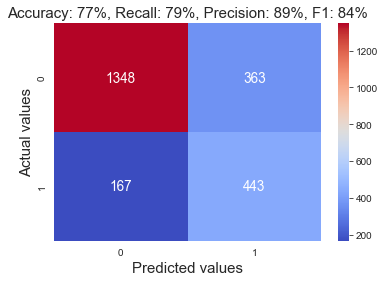

In [ ]:
sns.heatmap(confusion_matrix(y_test, ypred), annot=True, 
            cmap='coolwarm', fmt='d',
            annot_kws={'fontsize': 13.5,
                       'color': 'w'})
plt.xlabel('Predicted values', size=15)
plt.ylabel('Actual values', size=15)
plt.title('Accuracy: 77%, Recall: 79%, Precision: 89%, F1: 84%', size=15)